In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
df = pd.read_csv('data.csv')
df['published_at'] = (pd.to_datetime(df['published_at'])).dt.date
df.head()

,id,name,schedule,accept_temporary,published_at,city,salary_mean,skills,experience,professional roles,employer,employer trusted,url
0,74376536,Data scientist,remote,False,2022-12-29,Москва,175000.0,"['Python', 'PyTorch', 'Machine Learning', 'Spa...",От 3 до 6 лет,Аналитик,Астор,True,https://hh.ru/vacancy/74376536
1,74419911,Senior Machine Learning Engineer,remote,True,2022-12-30,Тбилиси,325000.0,"['Machine Learning', 'Python', 'Scikit-learn',...",От 3 до 6 лет,"Программист, разработчик",ТРТ,True,https://hh.ru/vacancy/74419911
2,74290436,"Machine Learning Engineer, Разработка средств ...",fullDay,False,2022-12-27,Уфа,80000.0,"['Python', 'AutoCAD', 'C++', 'C/C++', 'MATLAB'...",От 3 до 6 лет,"Программист, разработчик",Компания КРУС-Запад,True,https://hh.ru/vacancy/74290436
3,73999078,Machine learning engineer/ разработчик машинно...,remote,False,2022-12-19,Пермь,300000.0,['machine learning'],От 3 до 6 лет,"Программист, разработчик",HR Агент,True,https://hh.ru/vacancy/73999078
4,70428858,Senior Machine Learning Engineer (NLP/Speech),fullDay,False,2022-12-19,Сочи,314000.0,"['Python', 'Git', 'Английский язык', 'Atlassia...",От 1 года до 3 лет,"Программист, разработчик",Отраслевой центр разработки и внедрения информ...,True,https://hh.ru/vacancy/70428858


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  727 non-null    int64  
 1   name                727 non-null    object 
 2   schedule            727 non-null    object 
 3   accept_temporary    727 non-null    bool   
 4   published_at        727 non-null    object 
 5   city                727 non-null    object 
 6   salary_mean         727 non-null    float64
 7   skills              727 non-null    object 
 8   experience          727 non-null    object 
 9   professional roles  727 non-null    object 
 10  employer            727 non-null    object 
 11  employer trusted    727 non-null    bool   
 12  url                 727 non-null    object 
dtypes: bool(2), float64(1), int64(1), object(9)
memory usage: 64.0+ KB


In [17]:
for feature in ['schedule', 'accept_temporary', 'experience', 'employer trusted']:
    print(feature)
    print(df[feature].value_counts())
    print('-'*10)

schedule
fullDay     402
remote      269
flexible     43
shift        13
Name: schedule, dtype: int64
----------
accept_temporary
False    686
True      41
Name: accept_temporary, dtype: int64
----------
experience
От 1 года до 3 лет    284
От 3 до 6 лет         217
Нет опыта             198
Более 6 лет            28
Name: experience, dtype: int64
----------
employer trusted
True     719
False      8
Name: employer trusted, dtype: int64
----------


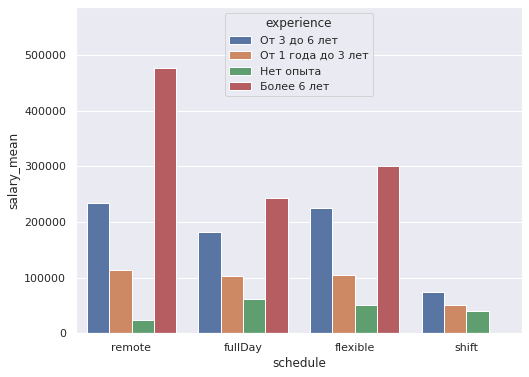

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='schedule', y='salary_mean', hue='experience', errwidth=0)
plt.show()

In [33]:
city_list = ['Москва', 'Санкт-Петербург']


,id,name,schedule,accept_temporary,published_at,city,salary_mean,skills,experience,professional roles,employer,employer trusted,url
717,73865136,Тестировщик программного обеспечения,fullDay,False,2022-12-15,Москва,90000.0,"['Linux', 'Тестирование ПО', 'ЛВС', 'Серверное...",От 1 года до 3 лет,Тестировщик,"Точных Приборов, НИИ",True,https://hh.ru/vacancy/73865136
718,73864897,Системный администратор Linux,fullDay,False,2022-12-15,Москва,175000.0,"['Linux', 'Puppet', 'Python', 'Bash', 'Kuberne...",От 3 до 6 лет,Системный администратор,"Точных Приборов, НИИ",True,https://hh.ru/vacancy/73864897
719,72076790,Диспетчер технической поддержки (сменный графи...,shift,False,2022-12-05,Москва,35000.0,"['Деловое общение', 'Телефонные переговоры', '...",От 1 года до 3 лет,Офис-менеджер,АСТ,True,https://hh.ru/vacancy/72076790
720,72729547,Sales Intеrn Central Federal District / Стажер...,fullDay,False,2022-12-01,Москва,70000.0,[],Нет опыта,Другое,Procter & Gamble,True,https://hh.ru/vacancy/72729547
726,73719262,No-code Developer,fullDay,False,2022-12-12,Москва,90000.0,"['Английский язык', 'MS PowerPoint', 'Digital ...",От 1 года до 3 лет,"Программист, разработчик",Senteo Inc,True,https://hh.ru/vacancy/73719262


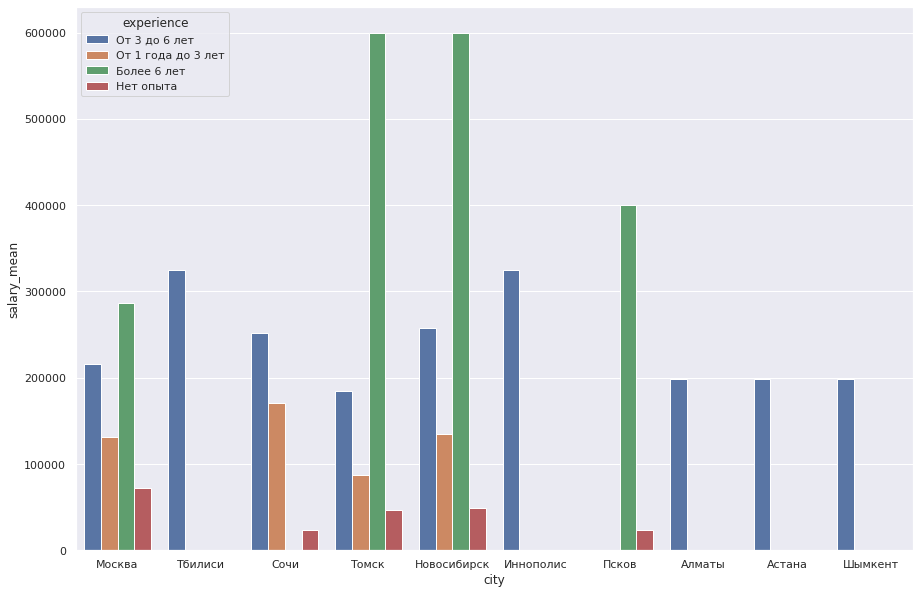

In [62]:
city_list = (df.groupby('city')[['city', 'salary_mean']]
                 .agg({'salary_mean': np.mean})
                 .nlargest(10, 'salary_mean')
                ).index
plt.figure(figsize=(15, 10))
sns.barplot(data=df[df['city'].isin(city_list)], x='city', y='salary_mean', hue='experience', errwidth=0)
plt.show()